# Multiple Linear Regression


### Import required packages

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from dmba import regressionSummary

In [4]:
#Import data
df = pd.read_csv("./data/ToyotaCorolla.csv")

#Creating X and Y
X = df.drop('Price',axis = 1)
Y = df.Price

#Encoding variables
X = pd.get_dummies(X,drop_first = False)

#Partition
train_x,test_x, train_y, test_y = train_test_split(X,Y, test_size = 0.4, random_state = 2012)

In [5]:
car_lm = LinearRegression()

car_lm.fit(train_x, train_y)

print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

intercept  -356281157835.0807
        Predictor   coefficient
0              Id -1.044232e+00
1       Age_08_04  1.480982e+07
2       Mfg_Month  1.480982e+07
3        Mfg_Year  1.777186e+08
4              KM -1.938983e-02
..            ...           ...
415     Color_Red  2.436955e+02
416  Color_Silver  3.228589e+02
417  Color_Violet -5.462506e+02
418   Color_White  3.329674e+02
419  Color_Yellow -3.430901e+02

[420 rows x 2 columns]


In [6]:
regressionSummary(train_y, car_lm.predict(train_x))
print()
regressionSummary(test_y, car_lm.predict(test_x))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 637.6398
            Mean Absolute Error (MAE) : 442.2569
          Mean Percentage Error (MPE) : -0.4488
Mean Absolute Percentage Error (MAPE) : 4.6432


Regression statistics

                      Mean Error (ME) : -541.1156
       Root Mean Squared Error (RMSE) : 5093.9109
            Mean Absolute Error (MAE) : 1863.5874
          Mean Percentage Error (MPE) : -6.1678
Mean Absolute Percentage Error (MAPE) : 17.7818


In [7]:
car_lm_pred = car_lm.predict(test_x) # Which data set are we calculating predictions
result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': test_y,'Error': test_y - car_lm_pred})
result.head(20)

,Predicted,Actual,Error
1104,7377.593628,7250,-127.593628
309,12592.718018,12450,-142.718018
1201,7396.279663,7850,453.720337
1169,8592.765747,9250,657.234253
101,16091.422607,16250,158.577393
916,8437.802612,7950,-487.802612
600,9217.399963,11250,2032.600037
266,12990.992126,12495,-495.992126
863,8935.317749,8200,-735.317749
940,10643.601868,9450,-1193.601868


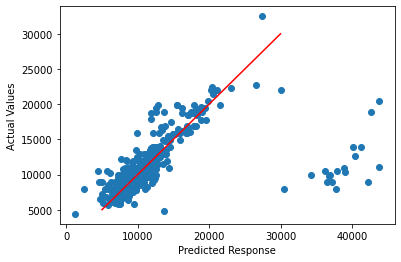

In [8]:
#Plotting Actual Vs Predicted
plt.scatter(result.Predicted,result.Actual)
plt.xlabel("Predicted Response")
plt.ylabel("Actual Values")
plt.plot( [5000,30000],[5000,30000],color="red" )

## Chapter Introduction
In the previous chapter, we discussed similarity and clustering as a data pre-processing step. It is an important organizational step that helps analyze the data as a whole before moving into regression analysis and identifying the direct impact of certain variables on others. In this chapter, we’ll go over the basics of that regression analysis, focusing on one of the most popular models for making predictions when we have a numerical outcome variable, Multiple Linear Regression (MLR). 

In this chapter, we’ll go over: 
1. What is MLR?
2. Assumptions behind MLR
3. Steps to MLR
4. MLR + Predictions

### What is MLR
Recall from Chapter 2 that data mining methods fall under two main categories: supervised learning and unsupervised learning. These learning methods are classified based on the presence and type of outcome variable; in supervised learning, we predict a previously determined outcome variable, and in unsupervised learning, we identify patterns within the data. Under unsupervised learning, the main method we’ll cover in this class is clustering, and under supervised learning, the two branches we’ll cover are regression and classification.

The goal of Regression is to predict numerical outcomes and can be used to predict values in various situations. For example, predicting the amount spent on a fraudulent transaction would be a regression problem.

Regression can be used for explanatory or predictive modeling.

Explanatory Modeling - Creating a model that fits well with existing data (the data on which it was trained)
Uses the entire data set to maximize information and focus on the coefficients
Represents the relationship between existing dependent and independent variables, not predicting new values for dependent variables

Predictive Modeling – Creating a model that has high predictive accuracy on new data
Partitions to assess predictive performance and avoids overfitting with the focus being on predictions
Accurately predicts new values for dependent variables, not descriptions of associations between existing dependent and independent variables 

The goal of Classification is to predict categorical outcomes, such as whether or not an outcome will be true or the probability that an outcome will occur. Within classification, there are two types of outcomes: class membership and propensity. Class membership refers to the categorical variable itself, while propensity refers to the probability of the class membership. For example, predicting whether or not a transaction is fraudulent would be a classification problem.

Here are some more examples:

How much will a house sell for? - Regression (numerical outcome)

Will a student pass a test or not? - Classification (class membership)

What is the probability of a certain student passing a class? - Classification (propensity)

One method of predicting numerical outcomes under regression is Linear Regression, which examines the relationship between a dependent variable (also referred to as the outcome variable, response, or target) and independent variable(s) (also referred to as the predictor(s), input variable(s), regressor(s), or covariate(s)) assuming a linear relationship. Simple Linear Regression (SLR) examines a single independent variable, while Multiple Linear Regression (MLR) examines multiple independent variables.

The equation below represents a linear relationship between multiple predictors and the outcome. We assume that this is the true relationship between the predictor variables and outcome variable. We will go over some examples and explanations to the different parts of this equation in the rest of this chapter.

y = β0 + β1x1 + β2x2 +⋯+ βpxp + ϵ

y: outcome variable
x1, ..., xp: predictor variables wherewith p is the= total number of predictors
β0: intercept
β1, ..., βp: coefficients with p = total number of predictors
ϵ: error (factors affecting y other than predictors)


Let’s walk through an example of predicting numerical outcomes.

You work at a Toyota dealership which buys back used cars from customers purchasing new cars. To make a profit, the dealership needs to predict the price that the used car will sell for.

| Variable   | Description                           |
|------------|---------------------------------------|
| Price      | Offer price in Euros                  |
| Age        | Age in months as of August 2004       |
| Kilometers | Accumulated Kilometers on odometer    |
| Fuel type  | Fuel type (Petrol, Diesel, CNG)       |
| HP         | Horsepower                            |
| Metallic   | Metallic color (Yes = 1, No= 0)       |
| Automatic  | Automatic (Yes = 1, No = 0)           |
| CC         | Cylinder volume in cubic centimeters  |
| Doors      | Number of doors                       |
| QuartTax   | Quarterly road tax in Euros           |
| Weight     | Weight in Kilograms                   |

Example: 

In this example, a relationship between several variables and price is already given. Later in this chapter, we’ll explore how to get these coefficients through MLR.

Price = 3 - 0.5 Age + 2 Automatic_binary + 3 PowerWindow_binary + 0.4 WarrantyLeft

We can interpret these variables quantitatively and qualitatively. A quantitative interpretation of this equation would state a 1 unit increase in the age of a car reduces price by 0.5 units of price whereas a qualitative interpretation of this equation would simply state an increase in age will reduce the price of the car (without specifying numerical values.)

We will use predictors (x1, ..., xp) to predict (instead of explain) outcome (y).

For example:
Use house characteristics to predict selling price
Use advertising expenditures to predict sales
Use product demand to predict valuation


### Assumptions about MLR
When dealing with multiple linear regression, we must always assume that there is a linear relationship between multiple predictors and the outcome. If a linear relationship is not present, a non-linear regression model must be utilized.

We must also assume independent variables are not highly correlated to one another; this creates the issue of multicollinearity. 

When converting categorical variables to dummy variables, we must drop one dummy variable to avoid multicollinearity. For example, continuing on from the Toyota dealership example, if we were to dummy code the variable Fuel, we would get Fuel_Petrol, Fuel_Diesel, and Fuel_CNG. If Fuel_Patrol and Fuel_Diesel are both 0, then the car in question must run on CNG. Including the variable Fuel_CNG in our model means that any one of the Fuel dummy variables can be determined by the remaining two dummy variables. will increase the correlation between the Fuel dummy variables and lead to This is an example of perfect multicollinearity. Therefore, as shownyou see in the image above, Fuel_CNG must be has been dropped from the model. It doesn’t matter which dummy variable is dropped, as long as one of them is.

By fitting the model to our data, we will estimate the coefficients to the predictor variables and use those to predict outcome values. We can then use those predicted outcome values to calculate residuals (also called errors). Estimates will remain unbiased if the mean of the error term is 0, and if the variance of the error term is constant, or homoskedastic.

In [60]:
predictors = ['age_08_04', 'km', 'fuel_type_Petrol', 'fuel_type_Diesel', 'hp', 'met_color', 'automatic', 'cc', 'doors', 'quarterly_tax', 'weight']

**Create an object named 'X' to include all predictors in X. Create an object named 'y' that holds the outcome variable. Print the number of predictors and the first 8 values of y (using `print`).**

In [61]:
X = car_df[predictors] 
y = car_df[outcome]  

## Now print the number of predictors and first 8 values of y
print(X.shape[1])
print(y[0:8])

11
0    13500
1    13750
2    13950
3    14950
4    13750
5    12950
6    16900
7    18600
Name: price, dtype: int64


### Task 11. Train/test split
**Using `train_test_split` function, split the dataset into two parts, 60% of the samples into train_X and train_y and 40% of the samples into test_X and test_y. Enter a random seed value of the current year (using argument `random_state=1`). Display the shape of the train data predictors.**

The random seed ensures that the random split in my notebook is the same as the random split in your notebook. Moreover, this means that when we try different models (e.g. include different predictors in our model), we are testing the model's predictive accuracy using the same training and test sets.

In [62]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1) #Hint: train_test_split(?, y, test_size=?, random_state=?)

## Display the number of rows and columns in each of these
print(train_X.shape)
print(valid_X.shape)
print(train_y.shape)
print(valid_y.shape)

(861, 11)
(575, 11)
(861,)
(575,)


### Task 12. Fitting a linear regression model
**Run a sci-kit_learn linear regression model on the training data. Print out the coefficients and summary regression statistics.**

In [63]:
# load the linear regression algorithm into an object called "car_lm"
car_lm = LinearRegression()

# fit the linear regression algorithm object to the training data, thus creating a model
car_lm.fit(train_X, train_y)

# print coefficients from the training data
print('intercept ', car_lm.intercept_)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

# print performance measures of the training data
# THIS IS CHECKING HOW WELL OUR MODEL FITS THE DATA IT LEARNED FROM
# THIS DOES NOT TELL US HOW WELL IT WILL PREDICT OUTCOMES FOR NEW DATA
regressionSummary(train_y, car_lm.predict(train_X))

intercept  -258.604216150472
           Predictor  coefficient
0          age_08_04  -124.110305
1                 km    -0.016059
2   fuel_type_Petrol  2413.063717
3   fuel_type_Diesel  4481.088703
4                 hp    75.549218
5          met_color    47.715778
6          automatic   462.441526
7                 cc    -5.027585
8              doors    58.417871
9      quarterly_tax    13.009195
10            weight    14.156177

Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1315.5318
            Mean Absolute Error (MAE) : 953.7443
          Mean Percentage Error (MPE) : -1.0544
Mean Absolute Percentage Error (MAPE) : 9.2370


When deciding between RMSE and MAE as a measure of the error, remember that MAE is easier to understand, but not always the best, because it's not as sensitive to large errors.

### Task 14. Prediction on test (validation) set

**Using the `predict` function, generate the summary regression statistics (`regressionSummary`) on the test (validation) set.**

Before, we were looking at how well our model fit the data it learned from. We are more interested in knowing how well our model does in predicting new values. We do that by making predictions on the holdout/validation/test set. (We will call it all those things! But it's just one set in this case.)

In [66]:
# Use predict() to make predictions on a new set
car_lm_pred = car_lm.predict(valid_X) # Which data set are we calculating predictions

Create a data frame that contains three columns ```predicted_response```, ```actual_response``` and ```Error```. 
with values ```car_lm_pred```, ```valid_y```, and ```valid_y - car_lm_pred```
Then print top 20 values of the data frame.

In [67]:
result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y,'Error': valid_y - car_lm_pred})
result.head(20)

,Predicted,Actual,Error
509,12323.811858,10900,-1423.811858
435,11177.152249,10895,-282.152249
321,14033.803003,10750,-3283.803003
1055,6413.897879,6500,86.102121
288,12724.302918,11895,-829.302918
48,18226.582638,17950,-276.582638
1403,7665.856654,7000,-665.856654
952,9961.900457,8400,-1561.900457
1097,7182.829823,7250,67.170177
204,11985.986724,12950,964.013276


Let us create a scatter plot between predicted response (X axis) v.s. actual response (Y axis). Set axis labels appropriately.

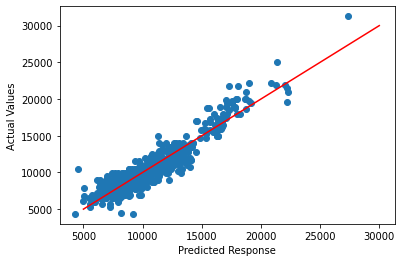

In [68]:
plt.scatter(result.Predicted,result.Actual)
plt.xlabel("Predicted Response")
plt.ylabel("Actual Values")
plt.plot( [5000,30000],[5000,30000],color="red" )

What is that outlier?? Let's find it.

In [69]:
result[result.Predicted == result.Predicted.min()]
car_df.iloc[80]
valid_X.loc[80]

age_08_04              25
km                  20019
fuel_type_Petrol        1
fuel_type_Diesel        0
hp                    110
met_color               1
automatic               1
cc                   1600
doors                   5
quarterly_tax         100
weight               1180
Name: 80, dtype: int64

Compare this to the distribution of data to see if we can find anything off.

In [71]:
# Compute common accuracy measures
regressionSummary(valid_y, car_lm_pred)


Regression statistics

                      Mean Error (ME) : 64.7805
       Root Mean Squared Error (RMSE) : 1261.1192
            Mean Absolute Error (MAE) : 969.2510
          Mean Percentage Error (MPE) : -0.4108
Mean Absolute Percentage Error (MAPE) : 9.6820


**Are the accuracy measures higher when calculated using the training data or the test data? Why?**